In [66]:
import pandas as pd
data = pd.read_excel("C:\\Users\\陈泽涛\\Desktop\\数据分析\\电商数据挖掘\\4、电商数据挖掘\\Online Retail.xlsx")
data.InvoiceDate = pd.to_datetime(data.InvoiceDate, format="%m/%d/%Y %H:%M")
data['yearmonth'] = data['InvoiceDate'].apply(lambda x: (100*x.year) + x.month)

In [2]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
null_CustomerID = data.loc[data['CustomerID'].isnull()] 
notnull_CustomerID = data.loc[~data['CustomerID'].isnull()] 


In [55]:
notnull_CustomerID = data.loc[~data['CustomerID'].isnull()] 

#remove the negative values and replace with nan
notnull_CustomerID.loc[notnull_CustomerID['Quantity'] <= 0, 'Quantity'] = np.nan
notnull_CustomerID.loc[notnull_CustomerID['UnitPrice'] < 0, 'UnitPrice'] = np.nan

notnull_CustomerID['total_dollars'] = notnull_CustomerID['Quantity']*notnull_CustomerID['UnitPrice']

D:\installations\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\installations\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [5]:
null_CustomerID.loc[null_CustomerID['Quantity'] <= 0, 'Quantity'] = np.nan
null_CustomerID.loc[null_CustomerID['UnitPrice'] < 0, 'UnitPrice'] = np.nan
d
#get the total spent for each line item
null_CustomerID['total_dollars'] = null_CustomerID['Quantity']*null_CustomerID['UnitPrice']

D:\installations\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\installations\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


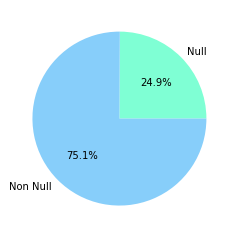

In [30]:
# 空与非空之间 占据对比
pie_data = []
pie_data.append(len(null_CustomerID))
pie_data.append(len(notnull_CustomerID))

plt.pie(pie_data, labels=['Null', 'Non Null'], autopct='%1.1f%%',colors = colors)
plt.show()

In [46]:
null_CustomerID.groupby(['Country']).size().sort_values(ascending=False)

Country
United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
dtype: int64

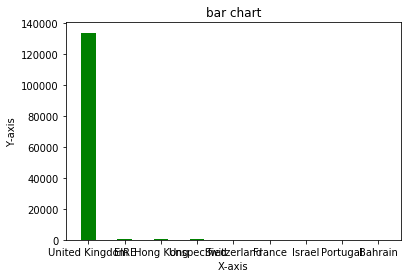

In [52]:
country = ['United Kingdom','EIRE','Hong Kong','Unspecified','Switzerland','France','Israel','Portugal','Bahrain']
cout = [133600,711,288,202,125,66,47,39,2]
#draw_bar(country,cout)
fig = plt.figure()
plt.bar(country,cout,0.4,color="green")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("bar chart")
plt.show()  

In [45]:
notnull_CustomerID.groupby(['Country']).size().sort_values(ascending=False)

Country
United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1480
Australia           1259
dtype: int64

In [57]:
# null 与 非null 之间的销售量的对比
x2312 = null_CustomerID.Quantity.describe()
notx2312 = notnull_CustomerID.Quantity.describe()
pd.DataFrame([x2312, notx2312], index=['Null', 'Not Null'])

,count,mean,std,min,25%,50%,75%,max
Null,133361.0,3.593892,28.123512,1.0,1.0,1.0,3.0,5568.0
Not Null,397924.0,13.021823,180.420210,1.0,2.0,6.0,12.0,80995.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
yearmonth      541909 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 37.2+ MB


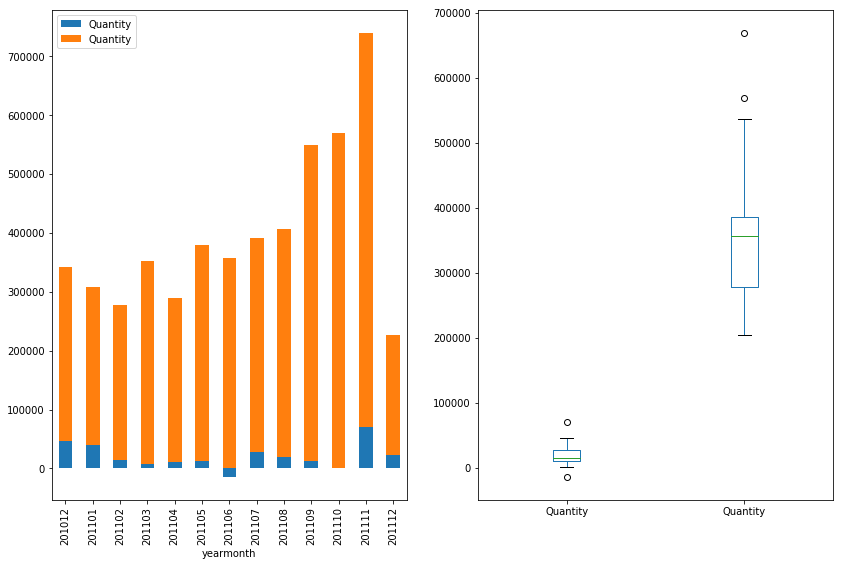

In [71]:
# 每个月份（12个月）之间 ， 销售量的对比

nullyearmonth = (null_CustomerID.groupby(['yearmonth'])['Quantity'].sum())
notnullyearmonth = (notnull_CustomerID.groupby(['yearmonth'])['Quantity'].sum())
yearmonth = pd.DataFrame([nullyearmonth , notnullyearmonth]).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))

yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1])


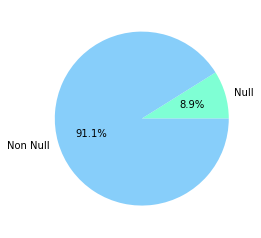

In [31]:
 # Total Sum of Quantity  null 与 notnull 总销量的对比
pie_data = []
#pie_data.append(null_CustomerID[null_CustomerID['Quantity'] <= 32]['Quantity'].sum())
#pie_data.append(notnull_CustomerID[notnull_CustomerID['Quantity'] <= 120]['Quantity'].sum())

pie_data.append(null_CustomerID['Quantity'].sum())
pie_data.append(notnull_CustomerID['Quantity'].sum())
colors = ["aquamarine","lightskyblue"]
plt.pie(pie_data, labels=['Null', 'Non Null'], autopct='%1.1f%%',colors=colors)
plt.show()


In [56]:
# 销售总额 的数据对比
x2312 = null_CustomerID.total_dollars.describe()
notx2312 = notnull_CustomerID.total_dollars.describe()

pd.DataFrame([x2312, notx2312], index=['Null', 'Not Null'])

,count,mean,std,min,25%,50%,75%,max
Null,133359.0,13.162041,74.032020,0.0,2.49,4.96,10.79,13541.33
Not Null,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


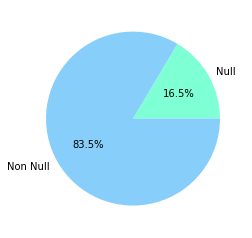

In [59]:
# 销售总金钱 ，饼状图 分析对比
pie_data = []
#pie_data.append(null_CustomerID[null_CustomerID['Quantity'] <= 32]['Quantity'].sum())
#pie_data.append(notnull_CustomerID[notnull_CustomerID['Quantity'] <= 120]['Quantity'].sum())

pie_data.append(null_CustomerID['total_dollars'].sum())
pie_data.append(notnull_CustomerID['total_dollars'].sum())

plt.pie(pie_data, labels=['Null', 'Non Null'], autopct='%1.1f%%',colors = colors)
plt.show()


In [11]:
data = pd.read_excel("C:\\Users\\陈泽涛\\Desktop\\数据分析\\电商数据挖掘\\4、电商数据挖掘\\Online Retail.xlsx",)
data.groupby(['Country']).size().sort_values(ascending=False)

Country
United Kingdom          495477
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [77]:
data = pd.read_excel("C:\\Users\\陈泽涛\\Desktop\\数据分析\\电商数据挖掘\\4、电商数据挖掘\\Online Retail.xlsx",)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C552049,22082,RIBBON REEL STRIPES DESIGN,-10,2011-05-06 10:00:00,1.65,17548,United Kingdom
1,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
2,550755,22926,IVORY GIANT GARDEN THERMOMETER,4,2011-04-20 12:01:00,5.95,17548,United Kingdom
3,C552049,22926,IVORY GIANT GARDEN THERMOMETER,-4,2011-05-06 10:00:00,5.95,17548,United Kingdom
4,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,2011-04-20 12:01:00,1.25,17548,United Kingdom
5,C552049,22585,PACK OF 6 BIRDY GIFT TAGS,-24,2011-05-06 10:00:00,1.25,17548,United Kingdom


In [ ]:

-------------------------数据探索性分析-------------------------------------------------------------------

In [3]:
df = pd.read_excel("C:\\Users\\陈泽涛\\Desktop\\数据分析\\电商数据挖掘\\4、电商数据挖掘\\Online Retail.xlsx",)
# 删除用户ID缺失的记录
df = df[df['CustomerID'].notnull()].copy()

# 数据类型转换
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('O')

# 计算时间变量
df['Month'] = df['InvoiceDate'].values.astype('datetime64[M]')
df['Day'] = df['InvoiceDate'].dt.day
df['Dayofweek'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# 计算价格
df['Price'] = df['Quantity'] * df['UnitPrice']

In [88]:
# 订单描述性统计分析
df.groupby('InvoiceNo')[['Quantity','Price']].sum().describe()

,Quantity,Price
count,22190.000000,22190.000000
mean,221.130599,374.045327
std,1170.215301,2018.482869
min,-80995.000000,-168469.600000
25%,30.000000,87.962500
50%,120.000000,241.505000
75%,254.000000,418.022500
max,80995.000000,168469.600000


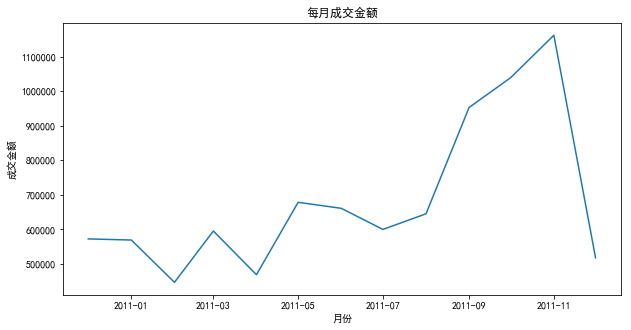

In [91]:
# 设置中文编码和负号的正常显示
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
# 商店消费情况绘图函数
def store_plot(data, xlab, ylab, title):
    plt.figure(figsize=(10,5))
    plt.plot(data)
    plt.xlabel('月份')
    plt.ylabel(ylab)
    plt.title(title)

# 每月成交金额，包含退款订单的金额
store_plot(data=df[df['Quantity']>0].groupby('Month')['Price'].sum(), xlab='月份',ylab='成交金额', title='每月成交金额')       

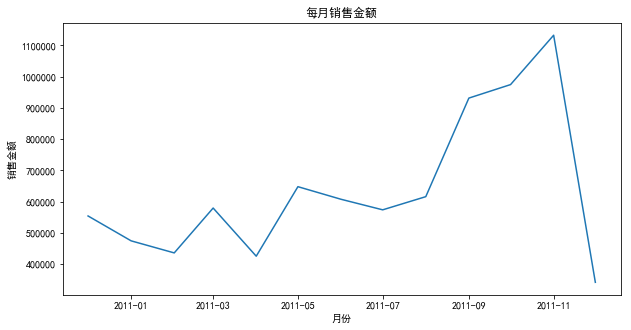

In [92]:
# 每月销售金额，成交金额-退款金额
store_plot(data=df.groupby('Month')['Price'].sum(), 
           xlab='月份', 
           ylab='销售金额', 
           title='每月销售金额')

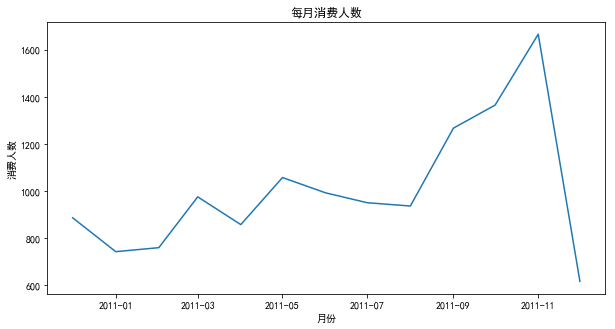

In [93]:
# 每月消费人数
store_plot(data=df[df['Quantity']>0].groupby('Month')['CustomerID'].nunique(), 
           xlab='月份', 
           ylab='消费人数', 
           title='每月消费人数')

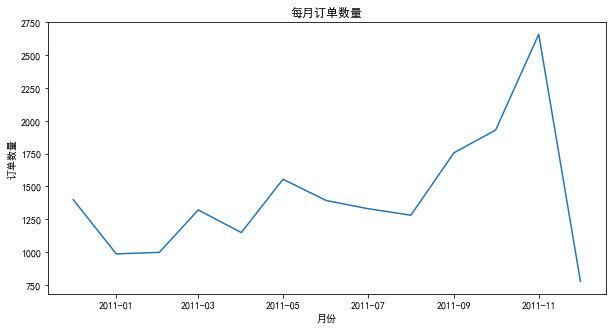

In [94]:
# 每月订单数量
store_plot(data=df[df['Quantity']>0].groupby('Month')['InvoiceNo'].nunique(), 
           xlab='月份', 
           ylab='订单数量', 
           title='每月订单数量')

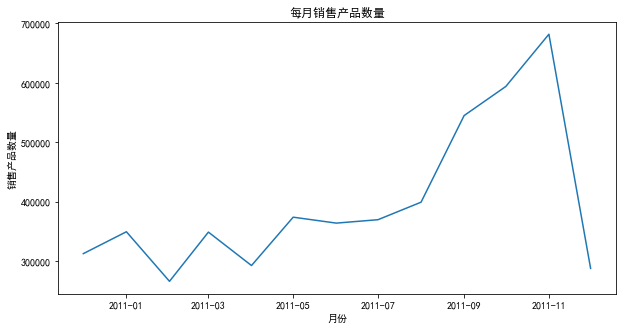

In [95]:
# 每月销售产品数量
store_plot(data=df[df['Quantity']>0].groupby('Month')['Quantity'].sum(), 
           xlab='月份', 
           ylab='销售产品数量', 
           title='每月销售产品数量')

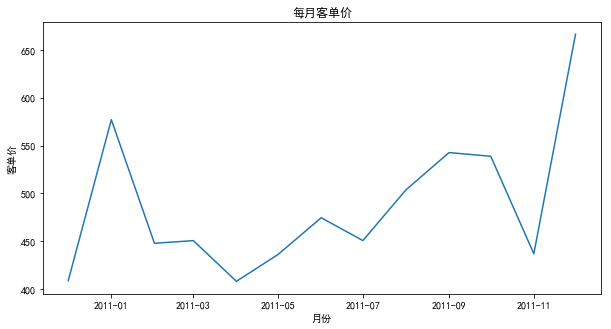

In [96]:
# 每月客单价
store_plot(data=df[df['Quantity']>0].groupby('Month')['Price'].sum()/df[df['Quantity']>0].groupby('Month')['InvoiceNo'].nunique(), 
           xlab='月份', 
           ylab='客单价', 
           title='每月客单价')

Text(0.5, 1.0, '不同国家用户数量')

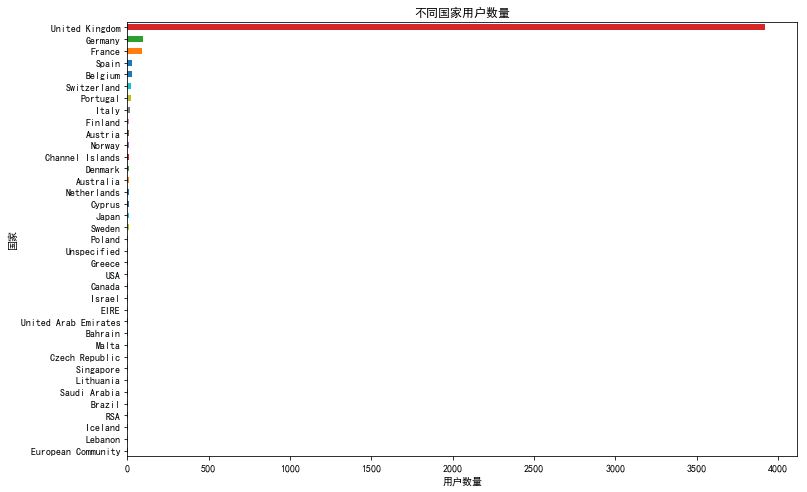

In [97]:
# 国家用户数量分布
plt.figure(figsize=(12,8))
df[df['Quantity']>0].groupby('Country')['CustomerID'].nunique().sort_values(ascending=True).plot.barh()
plt.xlabel('用户数量')
plt.ylabel('国家')
plt.title('不同国家用户数量')

Text(0.5, 1.0, '不同国家订单数量')

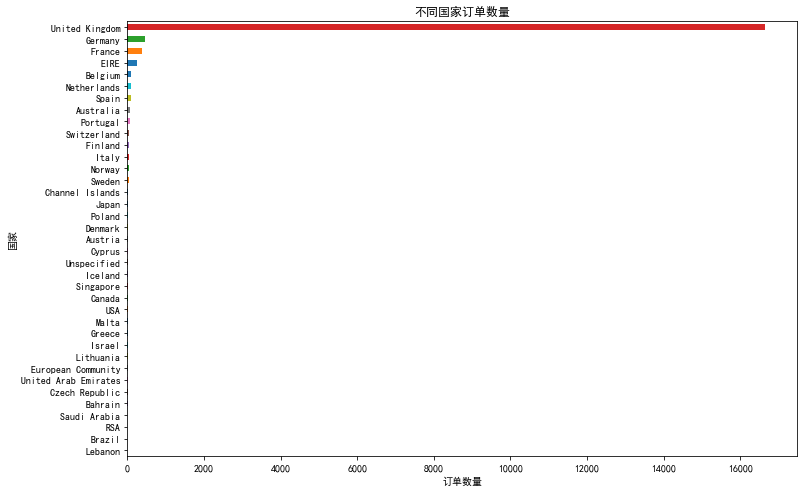

In [98]:
# 国家订单数量分布
plt.figure(figsize=(12,8))
df[df['Quantity']>0].groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=True).plot.barh()
plt.xlabel('订单数量')
plt.ylabel('国家')
plt.title('不同国家订单数量')

Text(0.5, 1.0, '不同国家成交金额')

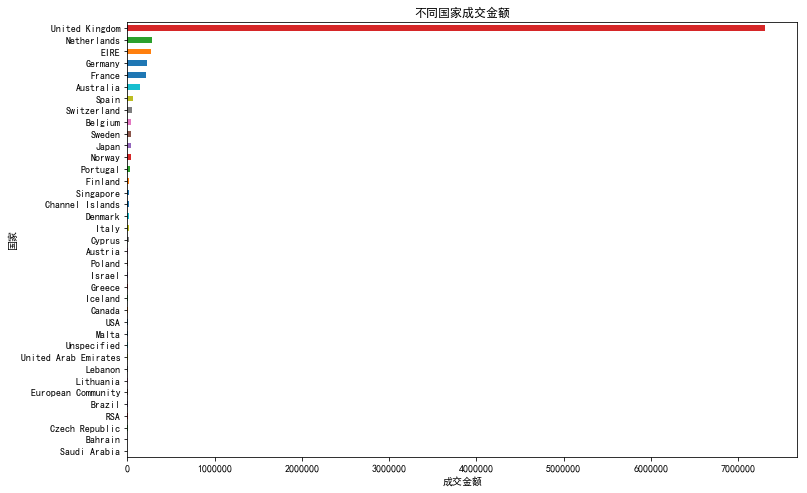

In [99]:
# 国家成交金额分布
plt.figure(figsize=(12,8))
df[df['Quantity']>0].groupby('Country')['Price'].sum().sort_values(ascending=True).plot.barh()
plt.xlabel('成交金额')
plt.ylabel('国家')
plt.title('不同国家成交金额')

Text(0.5, 1.0, '订单数随星期变化')

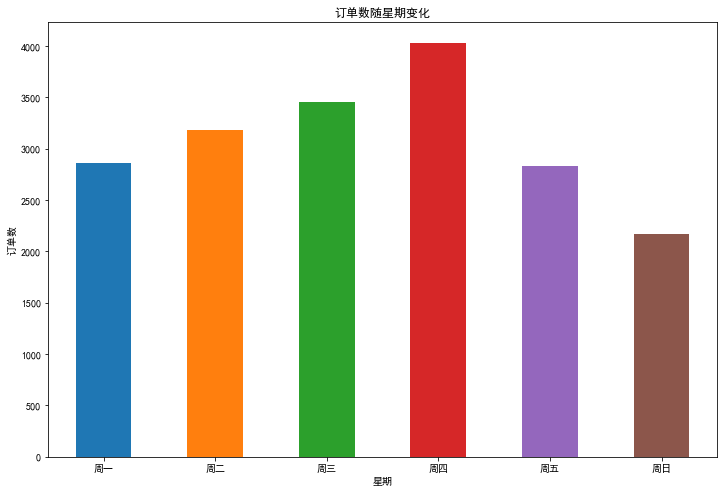

In [100]:
# 下单时间分布
# 星期
plt.figure(figsize=(12,8))
df[df['Quantity']>0].groupby('Dayofweek')['InvoiceNo'].nunique().plot.bar()
plt.xticks(range(6),['周一','周二','周三','周四','周五','周日'], rotation=0)
plt.xlabel('星期')
plt.ylabel('订单数')
plt.title('订单数随星期变化')

Text(0.5, 1.0, '订单数随小时变化')

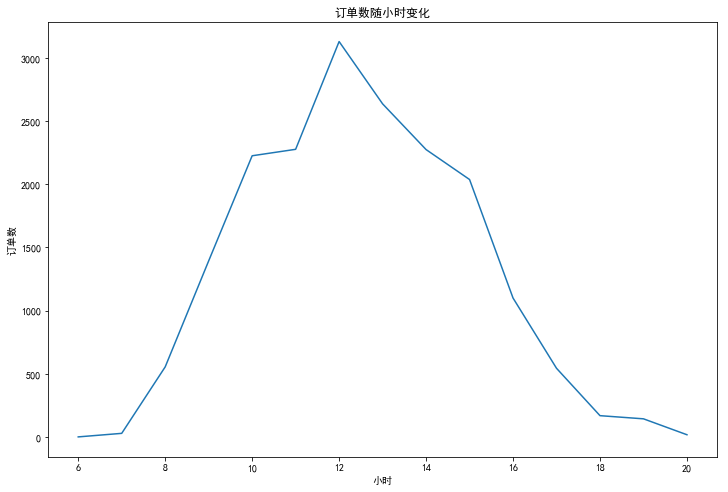

In [101]:
# 小时
plt.figure(figsize=(12,8))
df[df['Quantity']>0].groupby('Hour')['InvoiceNo'].nunique().plot()
plt.xlabel('小时')
plt.ylabel('订单数')
plt.title('订单数随小时变化')

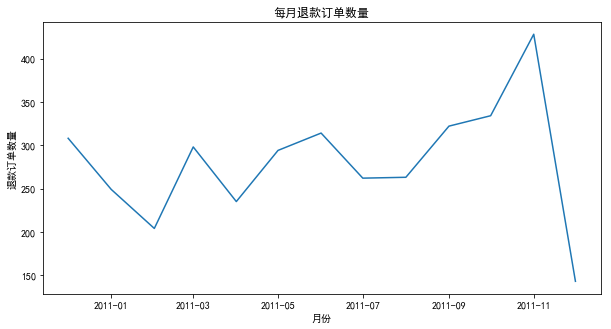

In [102]:
# 每月退款订单数量
store_plot(data=df[df['Quantity']<0].groupby('Month')['InvoiceNo'].nunique(), 
           xlab='月份', 
           ylab='退款订单数量', 
           title='每月退款订单数量')

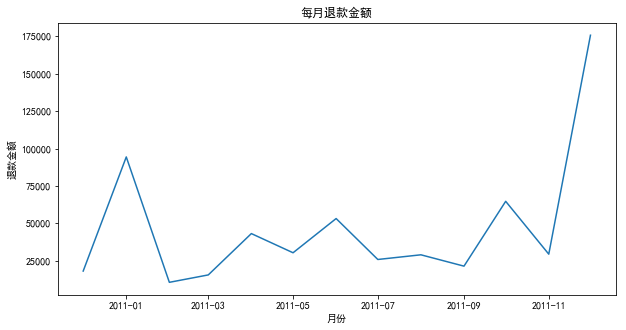

In [103]:
# 每月退款金额
store_plot(data=df[df['Quantity']<0].groupby('Month')['Price'].sum().abs(), 
           xlab='月份', 
           ylab='退款金额', 
           title='每月退款金额')

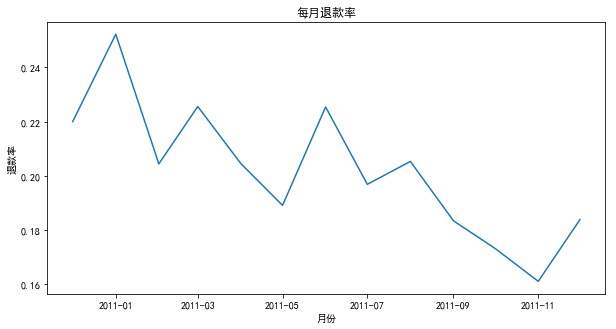

In [104]:
# 每月退款率
store_plot(data=df[df['Quantity']<0].groupby('Month')['InvoiceNo'].nunique()/df[df['Quantity']>0].groupby('Month')['InvoiceNo'].nunique(), 
           xlab='月份', 
           ylab='退款率', 
           title='每月退款率')

In [105]:
df[df['Quantity']>0].groupby('CustomerID').agg({'InvoiceNo':'nunique',
                                                'Quantity':'sum',
                                                'Price':'sum'}).describe()


,InvoiceNo,Quantity,Price
count,4339.000000,4339.000000,4339.000000
mean,4.271952,1194.214335,2053.793018
std,7.705493,5055.603049,8988.248381
min,1.000000,1.000000,0.000000
25%,1.000000,160.000000,307.245000
50%,2.000000,379.000000,674.450000
75%,5.000000,993.000000,1661.640000
max,210.000000,197491.000000,280206.020000


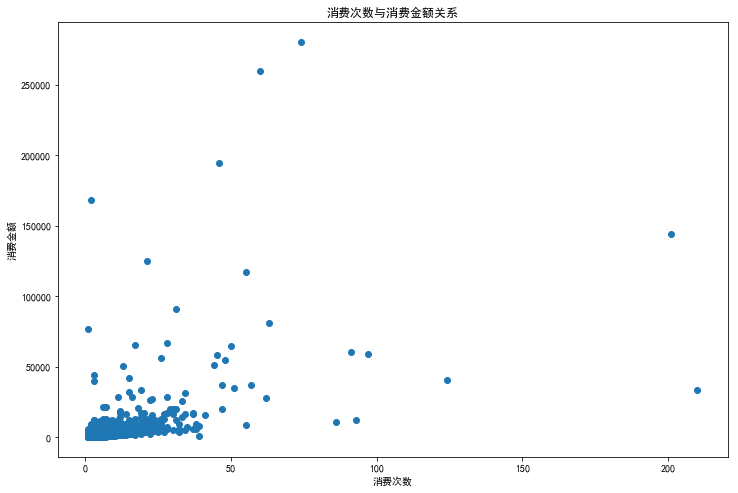

In [106]:
# 消费次数与消费金额关系
plt.figure(figsize=(12,8))
plt.scatter(x=df[df['Quantity']>0].groupby('CustomerID')['InvoiceNo'].nunique(),
            y=df[df['Quantity']>0].groupby('CustomerID')['Price'].sum())
plt.xlabel('消费次数')
plt.ylabel('消费金额')
plt.title('消费次数与消费金额关系')
plt.savefig('消费次数与消费金额关系.jpeg')

In [4]:
# 用户消费周期
purchase_time = df[df['Quantity']>0].groupby('CustomerID').apply(lambda x: x['InvoiceDate']-x['InvoiceDate'].shift()).dt.days
purchase_time.describe()

count    393585.000000
mean          1.425219
std          12.297206
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         365.000000
Name: InvoiceDate, dtype: float64

In [108]:
purchase_time[purchase_time>0].describe()


count    12242.000000
mean        45.821353
std         53.176595
min          1.000000
25%         12.000000
50%         28.000000
75%         58.000000
max        365.000000
Name: InvoiceDate, dtype: float64

Text(0.5, 1.0, '用户分层')

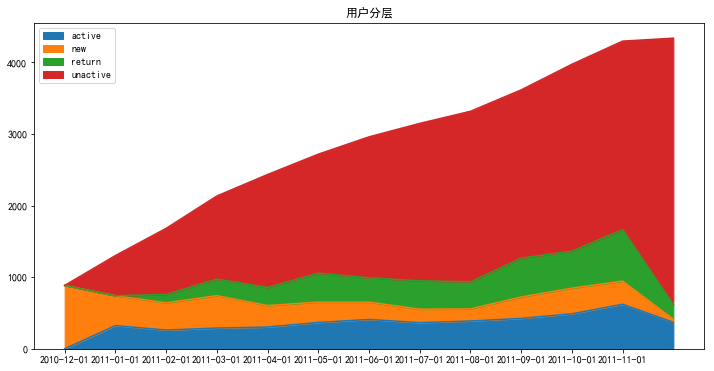

In [109]:
pivoted_amount = df[df['Quantity']>0].pivot_table(index='CustomerID',
                                                  columns='Month',
                                                  values='Price',
                                                  aggfunc='mean').fillna(0)
columns_month = df['Month'].sort_values().astype('str').unique()
pivoted_amount.columns = columns_month

pivoted_purchase = pivoted_amount.applymap(lambda x: 1 if x>0 else 0)

# 用户分层
def active_status(data):
    status = []
    for i in range(13):
        
        # 若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
                
        # 若本月消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status, index=columns_month)

pivoted_purchase_status = pivoted_purchase.apply(lambda x: active_status(x), axis=1)

purchase_status_counts = pivoted_purchase_status.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))

purchase_status_counts.fillna(0).T.plot.area(figsize=(12,6))
plt.xticks(range(12), columns_month)
plt.title('用户分层')

Text(0.5, 1.0, '回流率')

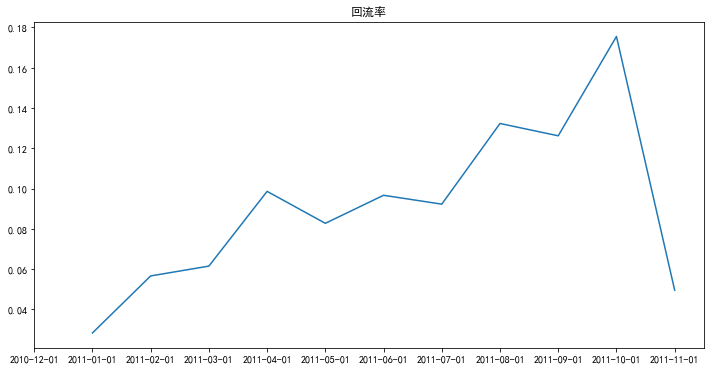

In [110]:
# 回流率
return_rate = purchase_status_counts.apply(lambda x:x / x.sum(), axis=1)
return_rate.loc['return'].plot(figsize=(12,6))
plt.xticks(range(1,13), columns_month)
plt.title('回流率')

Text(0.5, 1.0, '复购率')

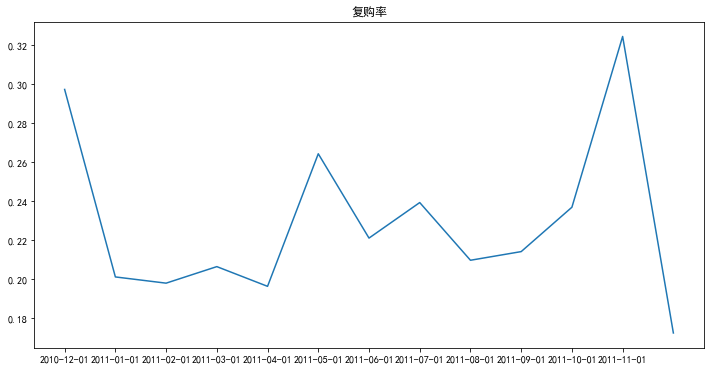

In [112]:
# 复购率
pivoted_counts = df[df['Quantity']>0].pivot_table(index='CustomerID', 
                                                  columns='Month',
                                                  values='InvoiceNo',
                                                  aggfunc='nunique').fillna(0)
columns_month = df['Month'].sort_values().astype('str').unique()
pivoted_counts.columns = columns_month

pivoted_counts_transf = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)

(pivoted_counts_transf.sum() / pivoted_counts_transf.count()).plot(figsize=(12,6))
plt.xticks(range(12), columns_month)
plt.title('复购率')

Text(0.5, 1.0, '回购率')

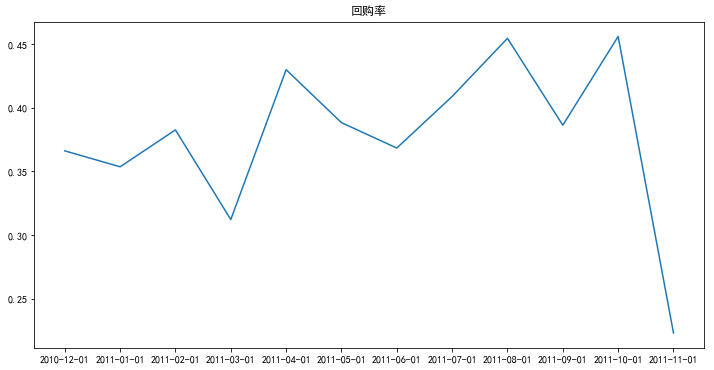

In [113]:
# 回购率
def purchase_return(data):
    status = []
    for i in range(12):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status, index=columns_month)

pivoted_purchase_return = pivoted_purchase.apply(purchase_return,axis=1)

(pivoted_purchase_return.sum() / pivoted_purchase_return.count()).plot(figsize=(12,6))
plt.xticks(range(12), columns_month)
plt.title('回购率')

In [8]:
# rfm
import datetime as dt
NOW = dt.datetime(2011,12,10)
rfm = df[df['Quantity']>0].groupby('CustomerID').agg({'InvoiceDate':lambda x:(NOW - x.max()).days,
                                                     'Quantity':'sum',
                                                     'Price':'sum'})
rfm.rename(columns={'InvoiceDate':'R',
                    'Quantity':'F',
                    'Price':'M'},inplace=True)
rfm.head()

def rfm_func(x):
    level = x.apply(lambda x: '1' if x > 0 else '0')
    label = level.R + level.F + level.M
    d = {
         '111':'重要价值客户', 
         '011':'重要保持客户', 
         '101':'重要挽留客户',
         '001':'重要发展客户',
         '110':'一般价值客户',
         '010':'一般保持客户',
         '100':'一般挽留客户',
         '000':'一般发展客户'
    }
    result = d[label]
    return result

rfm['label'] = rfm[['R','F','M']].apply(lambda x: x-x.median()).apply(rfm_func, axis=1)
rfm.groupby('label').sum()

,R,F,M
label,,,
一般价值客户,178528,173453,170042.820
一般保持客户,56061,231274,204618.790
一般发展客户,220004,245442,508859.412
一般挽留客户,1070965,272494,592277.040
重要价值客户,903198,1865839,2988683.231
重要保持客户,268077,2215599,3738138.340
重要发展客户,46092,79859,296300.261
重要挽留客户,238393,97736,412488.010


In [10]:
rfm.head()

,R,F,M,label
InvoiceNo,,,,
536365,373,40,139.12,一般挽留客户
536366,373,12,22.20,一般挽留客户
536367,373,83,278.73,一般挽留客户
536368,373,15,70.05,一般挽留客户
536369,373,3,17.85,一般挽留客户


In [9]:
rfm.groupby('label')['M'].count()

label
一般价值客户     714
一般保持客户     887
一般发展客户    3572
一般挽留客户    4095
重要价值客户    3520
重要保持客户    4136
重要发展客户     713
重要挽留客户     899
Name: M, dtype: int64